In [1]:
%matplotlib inline
from __future__ import absolute_import, unicode_literals
from os import listdir, sys, path, getcwd
from io import BytesIO

import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display
from ipywidgets import interact, interactive, fixed
from skimage import data, filters, io

sys.path.append(path.dirname(getcwd()))
from bin import cellConfluence_singleTask as p

In [2]:
def display_array(arr):
    ret, buf = cv2.imencode('.jpg', arr)
    return Image(buf.tobytes())

def imshow_pair(image_pair, titles=('', ''), figsize=(10, 5), **kwargs):
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    for ax, img, label in zip(axes.ravel(), image_pair, titles):
        ax.imshow(img, **kwargs)
        ax.set_title(label)
        
class File(object):
    path = ''

class Task(object):
    uploaded_image = File()
    result_image = File()
    result_display = File()

(1944L, 2592L, 3L)


c:\users\hotdogee\dropbox\work\cellbase\hidos-django\hidos\env\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


{'confluence': 0.29266103108723956}


<function __main__.view_image>

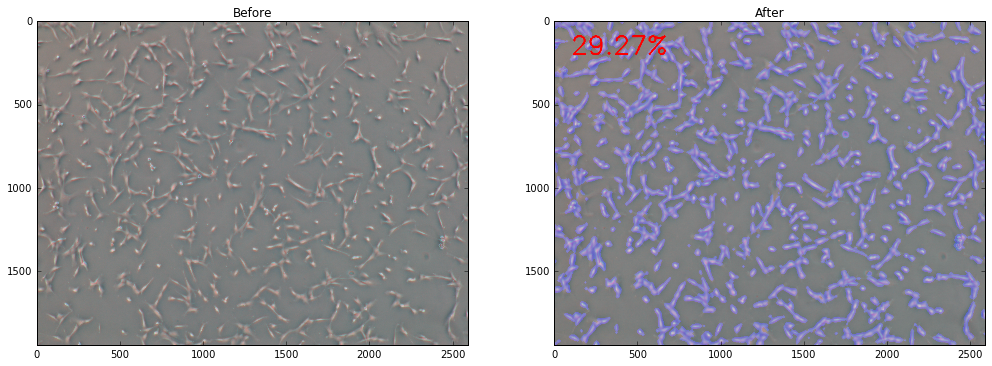

In [3]:
image_dir = './images/'
result_dir = './results/'
def view_image(image):
    name, ext = path.splitext(image)
    task_record = Task
    task_record.uploaded_image.path = image_dir + name + ext
    task_record.result_image.path = result_dir + name + '_result' + ext
    task_record.result_display.path = result_dir + name + '_result_display' + ext
    input_arr = cv2.imread(task_record.uploaded_image.path)
    print input_arr.shape
    
    result = p.cell_confluency_cv2(task_record)
    print result
    
    output_arr = cv2.imread(task_record.result_display.path)
    pair = [input_arr, output_arr]
    imshow_pair(pair, titles=('Before', 'After'), figsize=(17, 17))

interact(view_image, image=listdir(image_dir))